<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Distance_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
   import os
!pip install --upgrade gensim

import nltk
nltk.download('punkt')

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.1)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/CAPSTONE")
direc = "/content/gdrive/My Drive/Colab Notebooks/CAPSTONE/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!pip install import_ipynb
from bs4 import BeautifulSoup
import requests
import random
import numpy as np
import pandas as pd
import os
import re
import os
import importlib
import nltk
import matplotlib.pyplot as plt
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity as cosine

In [0]:
#listing possible names for same character
#to be used throughout
anne_names = ["Anne Shirley", "Anne", "Anne Blythe", "Mrs. Blythe", "Miss Blythe", "Mrs Blythe", "Anne dearie", "Mrs Blythe"]
diana_names = ["Diana Barry", "Diana"]
cornelia_names = ["Ms Cornelia", "Miss Cornelia", "Cornelia", "Cornelia Bryant", "Mrs Elliott", "Mrs. Elliott", "Mrs. Marshall Elliott", "Mrs Marshall Elliott"]
jem_names = ["Jem Blythe", "Jem"]
davy_names = ["Davy", "Davy Keith"]
walter_names = ["Walter Blythe", "Walter"]
marilla_names = ["Marilla Cuthbert", "Marilla"]
matthew_names = ["Matthew Cuthbert", "Matthew"]
gilbert_names = ["Gilbert Blythe", "Gilbert"]
rachel_names = ["Rachel", "Mrs. Lynde", "Mrs Lynde", "Rachel Lynde", "Mrs. Rachel Lynde", "Mrs Rachel Lynde"]
ruby_names = ["Ruby", "Ruby Gillis"]
jane_names = ["Jane Andrews", "Jane"]
josie_names = ["Josie Pye", "Josie"]
spencer_names = ["Mrs. Spencer", "Mrs Spencer"]
allan_names = ["Mrs. Allan", "Mrs Allan"]
minnie_may_names = ["Minnie May"]
billy_names = ["Billy", "Billy Andrews"]
stacy_names = ["Stacy", "Ms Stacy", "Ms. Stacy", "Ms. Muriel Stacy", "Ms Muriel Stacy", "Muriel Stacy", "Muriel"]
philip_names = ["Phillips", "Mr Phillips", "Mr. Phillips"]
barry_names = ["Mrs. Barry", "Mrs Barry"]
josephine_names = ["Mrs. Josephine Barry", "Aunt Josephine", "Mrs Josephine Barry"]


name_lists = {"Anne":anne_names, "Anne Shirley": anne_names, "Diana Barry": diana_names, "Diana": diana_names, "Marilla": marilla_names, "Marilla Cuthbert":marilla_names, "Matthew Cuthbert":matthew_names, "Matthew": matthew_names,\
              "Gilbert": gilbert_names, "Gilbert Blythe":gilbert_names, "Rachel": rachel_names, "Mrs. Rachel Lynde": rachel_names, "Ms Stacy":stacy_names, "Mr Philips": philip_names,\
              "Mrs. Spencer": spencer_names, "Ruby": ruby_names, "Jane Andrews": jane_names, "Billy Andrews": billy_names,\
              "Mr. Phillips":philip_names, "Miss Muriel Stacy": stacy_names, "Mrs. Barry": barry_names, "Aunt Josephine":josephine_names, \
              "Minnie May": minnie_may_names, "Mrs. Allan": allan_names, "Josie Pye": josie_names}

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
#pasting all utterances into lists
property_ = "speaking"
file1 = open(direc+"gables_{}_list.txt".format(property_), "r")
file2 = open(direc+"avonlea_{}_list.txt".format(property_), "r")
file3 = open(direc+"island_{}_list.txt".format(property_), "r")
file4 = open(direc+"poplars_{}_list.txt".format(property_), "r")
file5 = open(direc+"dreams_{}_list.txt".format(property_), "r")
file6 = open(direc+"ingleside_{}_list.txt".format(property_), "r")
file7 = open(direc+"rainbow_{}_list.txt".format(property_), "r")
file8 = open(direc+"rilla_{}_list.txt".format(property_), "r")
sentence_gables = []
sentence_dreams = []
sentence_island = []
sentence_avonlea = []
sentence_poplars = []
sentence_ingleside = []
sentence_rainbow = []
sentence_rilla = []
target_gables = []
target_dreams = []
target_island = []
target_avonlea = [] ###
target_poplars = []
target_ingleside = []
target_rainbow = []
target_rilla = [] ###

file1_lines =file1.readlines()
file2_lines = file2.readlines()
file3_lines = file3.readlines()
file4_lines = file4.readlines()
file5_lines = file5.readlines()
file6_lines = file6.readlines()
file7_lines = file7.readlines()
file8_lines = file8.readlines()

files = [file1_lines, file2_lines, file3_lines ,file4_lines, file5_lines, file6_lines, file7_lines, file8_lines]
sentences = [sentence_gables, sentence_avonlea, sentence_island, sentence_poplars, sentence_dreams, sentence_ingleside, sentence_rainbow, sentence_rilla]
targets_pre = [target_gables, target_avonlea, target_island, target_poplars, target_dreams, target_ingleside, target_rainbow, target_rilla]

#we have saved it in line by line formats in the file, so we need to extract it here
for s in range(len(sentences)):
  for i in range(len(files[s])):
    if i%2==0:
      sentences[s].append([files[s][i]])
    else:
      targets_pre[s].append(files[s][i])
  # file.close()

In [0]:
#labeling book & character
from gensim.utils import simple_preprocess
book_character_labels = []
#contains tuples of character and book labels
for i in range(len(targets_pre)):
  for e in targets_pre[i]:
    in_labs = False
    for n in e.split(",")[1::2]:
      if (n, i) in book_character_labels:
        in_labs = n
    if in_labs==False:
      character_name_lengths = np.array([len(n) for n in e.split(",")[1::2]])
      book_character_labels.append((i, e.split(",")[np.argmax(character_name_lengths)*2+1]))
    else:
      book_character_labels.append((i, in_labs))

# book_character_labels = [(character_labels[e], book_labels[e]) for e in range(len(character_labels))]

sentences_flattened = []
for i in sentences:
  for e in i:
    sentences_flattened.append(simple_preprocess(e[0]))
    #after we have labelled the sentences, there is no longer a need to 
    #keep them in book lists, we keep it simply as a full list of utterances

In [0]:
def get_char_doc(snip = False):
  character_documents = {}
  for i in range(len(sentences_flattened)):
    a = character_documents.get(book_character_labels[i], [])
    a.append("\n")
    a.extend(sentences_flattened[i])
    character_documents[book_character_labels[i]] = a
  if snip == False:
    return character_documents
  else:
    for e in character_documents:
      l_spl = " ".join(character_documents[e]).split("\n")
      character_documents[e] = "\n".join(random.sample(l_spl, int(len(l_spl)*0.6))).split(' ')[:-1]
    return character_documents
  
character_documents = get_char_doc()
character_documents_snipped = get_char_doc(snip = True)
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(character_documents.values()))]
documents_snipped = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(character_documents_snipped.values()))]

In [0]:
len(documents_snipped)

441

In [0]:
def find_vector_for_character(characters_as_vectors, names, book = 0, cdocs = character_documents):
  anne_vectors_lda = []
  total_weighting = 0
  for i in range(len(cdocs.keys())):
    for n in names:
      if n in list(cdocs.keys())[i][1]:
        if book==list(cdocs.keys())[i][0]:
          if not list(cdocs.keys())[i][1] == "Anne Cordelia":
            weighting = book_character_labels.count(list(cdocs.keys())[i])
            total_weighting += weighting
            anne_vectors_lda.append(np.array(characters_as_vectors[i])*weighting)
  return [np.sum(np.array(anne_vectors_lda), axis = 0)/total_weighting] #mean


In [0]:
from nltk.tokenize import sent_tokenize
from gensim.test.utils import common_texts
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import timeit
from scipy.stats import ttest_ind


# Representing characters (Doc2Vec)

In [0]:
#this cell is used to train the doc2vec model,
#but we reuse character_documents and and anne_characters elsewhere

def train_doc2vec(randomise=False, lemmatize=False, return_model=False, epochs = 50, snipped = False):
  if randomise==False:
      if snipped==True:
        processed_docs = documents_snipped
      else:
        processed_docs = documents
      model_d2v = Doc2Vec(processed_docs, vector_size=100, window=2, min_count=1, workers=4, dm = 1, epochs = epochs)
      model_d2v.init_sims()
  else:
      if snipped==True:
        model_d2v = Doc2Vec(random.sample(documents_snipped, len(documents_snipped)), vector_size=100, window=2, min_count=1, workers=4, dm = 1, epochs = epochs)
      else:
        model_d2v = Doc2Vec(random.sample(documents, len(documents)), vector_size=100, window=2, min_count=1, workers=4, dm = 1, epochs = epochs)
      model_d2v.init_sims()
  characters_as_vectors = np.array(model_d2v.docvecs.vectors_docs_norm)
  if snipped==True:
    anne_vectors = [find_vector_for_character(characters_as_vectors, anne_names, i, cdocs = character_documents_snipped)[0] for i in range(8)]
  else:
    anne_vectors = [find_vector_for_character(characters_as_vectors, anne_names, i, cdocs = character_documents)[0] for i in range(8)]
  # for i in range(len(character_documents.keys())):
  #   if list(character_documents.keys())[i][1] in anne_names: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
  # #     print('ok')
  #       if book_character_labels.count(list(character_documents.keys())[i])>5:
  #         anne_vectors.append(characters_as_vectors[i])
  if return_model==True:
    return model_d2v
  return anne_vectors, characters_as_vectors

# start = timeit.default_timer()
# anne_vectors, characters_as_vectors = train_doc2vec()
# stop =   timeit.default_timer()
# print(stop-start)  

In [0]:
# train_doc2vec(snipped=True)

In [0]:
def train_lda(randomise=False, lemmatize= False, coherence_test = False, num_topics = 10, snipped = False, passes = 50):
  start = timeit.default_timer()
  if randomise==False:
      if snipped==True:
        dictionary = gensim.corpora.Dictionary([i[0] for i in documents_snipped])
        bow_corpus = [dictionary.doc2bow(doc[0]) for doc in documents_snipped]
      else:
        dictionary = gensim.corpora.Dictionary([i[0] for i in documents])
        bow_corpus = [dictionary.doc2bow(doc[0]) for doc in documents]
  else:
      if lemmatize==True:
        processed_docs = [i[0] for i in random.sample(documents, len(documents))]
        processed_docs  = [i.split() for i in lemmatization(processed_docs)]#change the corpus to bag of words
        dictionary = gensim.corpora.Dictionary(processed_docs)
        bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
      else:
        dictionary = gensim.corpora.Dictionary([i[0] for i in random.sample(documents, len(documents))])
        bow_corpus = [dictionary.doc2bow(doc) for doc in [i[0] for i in random.sample(documents, len(documents))]]

  # tfidf = models.TfidfModel(bow_corpus)
  # corpus_tfidf = tfidf[bow_corpus]
  #convert bow to tfidf
  if coherence_test==True:
    coherences = []
    for n in [5, 10, 20, 30, 40, 50]:
      lda_model= LdaModel(corpus=bow_corpus, num_topics=n, id2word=dictionary, minimum_probability=0.0, passes = passes)
      cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
      coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
      coherences.append(coherence)
    lda_model= LdaModel(corpus=bow_corpus, num_topics=[5, 10, 20, 30, 40, 50, 100][np.argmax(coherences)], id2word=dictionary, minimum_probability=0.0, passes = passes)
  else: 
    lda_model= LdaModel(corpus=bow_corpus, num_topics=num_topics, id2word=dictionary, minimum_probability=0.0, passes = passes)
  characters_as_vectors_lda = [[e[1] for e in lda_model[i]] for i in bow_corpus]
  anne_vectors_lda = [find_vector_for_character(characters_as_vectors_lda, anne_names, i) for i in range(8)]
  if coherence_test==True:
    return anne_vectors_lda, characters_as_vectors_lda, [5, 10, 20, 30, 40, 50, 100][np.argmax(coherences)]
  else:
    return anne_vectors_lda, characters_as_vectors_lda

# top = train_lda(coherence_test=True, passes = 50)[2]
# print(top)

# start = timeit.default_timer()
# anne_vectors, characters_as_vectors = train_lda(passes=50, num_topics = 10)
# stop =   timeit.default_timer()
# print(stop-start)  

In [0]:
# characters_as_vectors_100 = []
# characters_as_vectors_100_lda = []
# characters_as_vectors_100_samp = []
# characters_as_vectors_100_lda_samp = []

# for i in range(100):
#   print(i)
#   characters_as_vectors_100.append(train_doc2vec()[1])
#   characters_as_vectors_100_lda.append(train_lda()[1])
#   characters_as_vectors_100_samp.append(train_doc2vec(randomise = True)[1])
#   characters_as_vectors_100_lda_samp.append(train_lda(randomise = True)[1])

In [0]:
# np.save(direc+'characters_as_vectors_100.npy', characters_as_vectors_100)
# np.save(direc+'characters_as_vectors_100_samp.npy', characters_as_vectors_100_samp)

# with open(direc +"characters_as_vectors_100_lda.txt", "w") as f:
#   f.write( str(characters_as_vectors_100_lda))

# with open(direc + "characters_as_vectors_100_lda_samp.txt", "w") as f:
#   f.write(str(characters_as_vectors_100_lda_samp))

In [0]:
import ast
from numpy import array
from numpy import float32

with open(direc + "characters_as_vectors_100_lda.txt", "r") as f:
  s = f.read()
  characters_as_vectors_100_lda = ast.literal_eval(s)

with open(direc + "characters_as_vectors_100_lda_samp.txt", "r") as f:
  s = f.read()
characters_as_vectors_100_lda_samp = ast.literal_eval(s)

characters_as_vectors_100 = np.load(direc+'characters_as_vectors_100.npy')
characters_as_vectors_100_samp = np.load(direc+'characters_as_vectors_100_samp.npy')


# Cosine similarity (Doc2Vec)

n:0
n:1
n:2
n:3
n:4


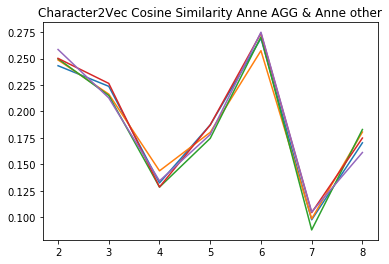

In [0]:
#quick check
for n in range(5):
  print("n:{}".format(n))
  anne_vectors, characters_as_vectors = train_doc2vec()
  similarities = []
  for i in range(1, 8):
    c1_names = anne_names
    c2_names = anne_names
    book1 = 0
    book2 = i
    c1 = np.array(find_vector_for_character(characters_as_vectors, c1_names, book=book1))
    c2 = np.array(find_vector_for_character(characters_as_vectors, c2_names, book=book2))
    similarities.append(cosine(c1, c2)[0][0])
  plt.plot(range(2, 9), similarities)
  plt.title("Character2Vec Cosine Similarity Anne AGG & Anne other")
plt.show()

n:0
n:1
n:2
n:3
n:4


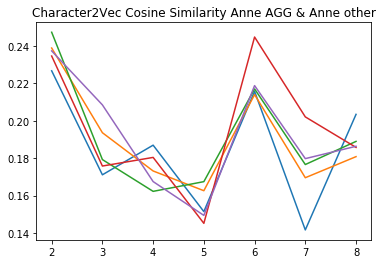

In [0]:
#quick check snipped
for n in range(5):
  print("n:{}".format(n))
  anne_vectors, characters_as_vectors = train_doc2vec(snipped = True)
  similarities = []
  for i in range(1, 8):
    c1_names = anne_names
    c2_names = anne_names
    book1 = 0
    book2 = i
    c1 = np.array(find_vector_for_character(characters_as_vectors, c1_names, book=book1))
    c2 = np.array(find_vector_for_character(characters_as_vectors, c2_names, book=book2))
    similarities.append(cosine(c1, c2)[0][0])
  plt.plot(range(2, 9), similarities)
  plt.title("Character2Vec Cosine Similarity Anne AGG & Anne other")
plt.show()

# Cosine similarity Latent Dirichlet Allocation

n:0
n:1
n:2
n:3
n:4


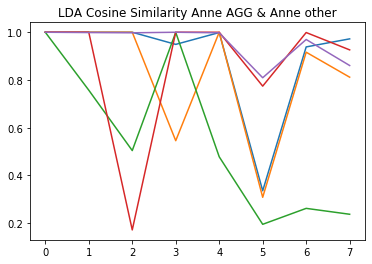

In [0]:
#functionalize
for n in range(5):
  print("n:{}".format(n))
  similarities = []
  anne_vectors, characters_as_vectors = train_lda()
  for i in range(0, 8):
    c1_names = anne_names
    c2_names = anne_names
    book1 = 0
    book2 = i
    c1 = np.array(find_vector_for_character(characters_as_vectors, c1_names, book=book1))
    c2 = np.array(find_vector_for_character(characters_as_vectors, c2_names, book=book2))
    similarities.append(cosine(c1, c2)[0][0])
  plt.plot(range(0, 8), similarities)
  plt.title("LDA Cosine Similarity Anne AGG & Anne other")
plt.show()

n:0
n:1
n:2
n:3
n:4


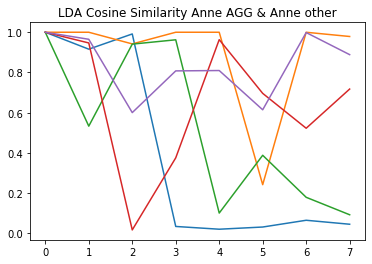

In [0]:
#quick check snipped
for n in range(5):
  print("n:{}".format(n))
  similarities = []
  anne_vectors, characters_as_vectors = train_lda(snipped = True)
  for i in range(0, 8):
    c1_names = anne_names
    c2_names = anne_names
    book1 = 0
    book2 = i
    c1 = np.array(find_vector_for_character(characters_as_vectors, c1_names, book=book1))
    c2 = np.array(find_vector_for_character(characters_as_vectors, c2_names, book=book2))
    similarities.append(cosine(c1, c2)[0][0])
  plt.plot(range(0, 8), similarities)
  plt.title("LDA Cosine Similarity Anne AGG & Anne other")
plt.show()

In [0]:
#spearman correlate
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("error")
#treat warnings as errors and catch

sp_df = pd.read_csv(direc + "anne-correlate.csv")


def cosine_between_characters(names1, names2, charactersv):
  c1 = np.array(find_vector_for_character(charactersv, names1, book = 0))
  c2 = np.array(find_vector_for_character(charactersv, names2, book = 0))
  return cosine(c1, c2)[0][0]

l_model_d2v = []
l_model_lda = []
l_model_d2v_sample = []
l_model_lda_sample = []
l_human = sp_df["human_annotation"]
l_c1 = sp_df["c1"]
l_c2 = sp_df["c2"]
for trial in range(len(characters_as_vectors_100)):
  l_human_s = []
  l_model_d2v_s = []
  l_model_lda_s = []
  l_model_d2v_s_sample = []
  l_model_lda_s_sample = []
  l_c1_s=[]
  l_c2_s=[]
  for i in range(len(sp_df)):
      l_model_d2v_s.append(cosine_between_characters(name_lists[sp_df["c1"][i]], name_lists[sp_df["c2"][i]], characters_as_vectors_100[trial]))
      l_model_lda_s.append(cosine_between_characters(name_lists[sp_df["c1"][i]], name_lists[sp_df["c2"][i]], characters_as_vectors_100_lda[trial]))
      l_model_d2v_s_sample.append(cosine_between_characters(name_lists[sp_df["c1"][i]], name_lists[sp_df["c2"][i]], characters_as_vectors_100_samp[trial]))
      l_model_lda_s_sample.append(cosine_between_characters(name_lists[sp_df["c1"][i]], name_lists[sp_df["c2"][i]], characters_as_vectors_100_lda_samp[trial]))
  l_model_d2v.append(np.array(l_model_d2v_s))
  l_model_lda.append(np.array(l_model_lda_s))
  l_model_d2v_sample.append(np.array(l_model_d2v_s_sample))
  l_model_lda_sample.append(np.array(l_model_lda_s_sample))

lda_out = np.mean(np.array(l_model_lda), axis = 0)
c2v_out = np.mean(np.array(l_model_d2v), axis = 0)

In [15]:
print(spearmanr(list(l_human), lda_out))
print(spearmanr(list(l_human), c2v_out))
print()

SpearmanrResult(correlation=0.18135948189346662, pvalue=0.2075061354204959)
SpearmanrResult(correlation=0.1389293187859781, pvalue=0.33594495844039196)



In [0]:
lda_pv = [ttest_ind(np.array(l_model_lda)[:,i], np.array(l_model_lda_sample)[:,i])[1] for i in range(len(lda_out))]
c2v_pv = [ttest_ind(np.array(l_model_d2v)[:,i], np.array(l_model_d2v_sample)[:,i])[1] for i in range(len(c2v_out))]

In [18]:
df = pd.DataFrame({'c1':l_c1, 'c2':l_c2, 'human': l_human, 'c2v': c2v_out, 'ldac': lda_out, 'pvlda':lda_pv, 'pvc2v':c2v_pv})
df = df.round(decimals = 3)
df.to_csv(direc+'anne-spearman-results.csv')
df

,c1,c2,human,c2v,ldac,pvlda,pvc2v
0,Anne,Matthew,0.90,0.530,0.945,0.000,0.000
1,Anne,Marilla,0.95,0.416,0.953,0.000,0.000
2,Anne,Rachel,0.90,0.494,0.941,0.000,0.000
3,Anne,Diana,0.95,0.590,0.933,0.000,0.000
4,Anne,Gilbert,0.70,0.471,0.888,0.000,0.000
5,Anne,Ruby,0.75,0.376,0.860,0.000,0.405
6,Anne,Mrs. Allan,0.75,0.446,0.788,0.000,0.005
7,Anne,Ms Stacy,0.90,0.273,0.540,0.614,0.000
8,Anne,Mr Philips,0.80,0.440,0.957,0.000,0.000
9,Anne,Josie Pye,0.70,0.486,0.915,0.000,0.000


In [0]:
#conducting experiments based on hypotheses stated in paper
from scipy.stats import ttest_ind
import timeit

"""as a note: we are using scipy's two-tailed t-test here but we will interpret the results as a one-tailed
t-test. for all three hypotheses below, we are performing a greater-than test which means that the p-values
can be interpreted as significant if p/2<0.05. 
"""
def test_hyp_two_pairs(c1_names, c2_names, c3_names, c4_names, model_name, book1, book2, book3, book4, n = 50, lemmatize = False):
  #using a frequentist approach to show that each character is statistically 
  #different from the "mean"
  one_samps = []
  two_samps = []
  one_samps_shuffle = []
  two_samps_shuffle = []
  if model_name=="c2v":
    cdocs = characters_as_vectors_100
    cdocs_samp = characters_as_vectors_100_samp
  else:
    cdocs= characters_as_vectors_100_lda
    cdocs_samp = characters_as_vectors_100_lda_samp
  for i in range(len(characters_as_vectors_100)):
    c1 = np.array(find_vector_for_character(cdocs[i], c1_names, book=book1))
    c2 = np.array(find_vector_for_character(cdocs[i], c2_names, book=book2))
    c3 = np.array(find_vector_for_character(cdocs[i], c3_names, book=book3))
    c4 = np.array(find_vector_for_character(cdocs[i], c4_names, book=book4))
    c1_samp = np.array(find_vector_for_character(cdocs_samp[i], c1_names, book=book1))
    c2_samp = np.array(find_vector_for_character(cdocs_samp[i], c2_names, book=book2))
    c3_samp = np.array(find_vector_for_character(cdocs_samp[i], c3_names, book=book3))
    c4_samp = np.array(find_vector_for_character(cdocs_samp[i], c4_names, book=book4))
    one_samps.append(cosine(c1, c2)[0][0])
    two_samps.append(cosine(c3, c4)[0][0])
    one_samps_shuffle.append(cosine(c1_samp, c2_samp)[0][0])
    two_samps_shuffle.append(cosine(c3_samp, c4_samp)[0][0])

  print(normaltest(one_samps))
  print(normaltest(two_samps))
  print(normaltest(one_samps_shuffle))
  print(normaltest(two_samps_shuffle))
  print(levene(one_samps, two_samps))
  return ttest_ind(one_samps, two_samps), np.mean(one_samps), np.mean(two_samps), \
  ttest_ind(one_samps, one_samps_shuffle),\
  ttest_ind(two_samps, two_samps_shuffle)


In [0]:
#hyp2 lda #lem false
print("lda")
print(test_hyp_two_pairs(anne_names, diana_names, anne_names, cornelia_names, "lda", 0, 0, 4, 4))

#hyp2 character2vec #lem false
print("c2v")
print(test_hyp_two_pairs(anne_names, diana_names, anne_names, cornelia_names, "c2v", 0, 0, 4, 4))

lda
NormaltestResult(statistic=67.24993529248286, pvalue=2.4938027359218143e-15)
NormaltestResult(statistic=28.701050993131233, pvalue=5.856605411300986e-07)
NormaltestResult(statistic=1889.8094451428797, pvalue=0.0)
NormaltestResult(statistic=1239.5799623699018, pvalue=6.739555164686209e-270)
LeveneResult(statistic=11.239912104788589, pvalue=0.000959040380799235)
(Ttest_indResult(statistic=3.344907314828036, pvalue=0.0009845517656581), 0.9326087529389059, 0.833065460030552, Ttest_indResult(statistic=8.72561569980751, pvalue=1.0887420435566705e-15), Ttest_indResult(statistic=5.386523366903694, pvalue=2.0256407975099586e-07))
c2v
NormaltestResult(statistic=3.388344004103091, pvalue=0.1837513117660996)
NormaltestResult(statistic=0.6551195673591015, pvalue=0.7206802050731893)
NormaltestResult(statistic=1.2683083368734034, pvalue=0.5303839140997046)
NormaltestResult(statistic=10.42783482522854, pvalue=0.005440319911326266)
LeveneResult(statistic=0.07008102509069938, pvalue=0.79149421837893

In [0]:
# #hyp1 lda #lem false
print("lda")
print(test_hyp_two_pairs(anne_names, jem_names, anne_names, davy_names, "lda",  6, 6, 1, 1))


#hyp1 character2vec #lem false
print("c2v")
print(test_hyp_two_pairs(anne_names, jem_names, anne_names, davy_names, "c2v", 6, 6, 1, 1))

lda
NormaltestResult(statistic=20.636947632600403, pvalue=3.301746756785841e-05)
NormaltestResult(statistic=41.93091080731248, pvalue=7.849073711400365e-10)
NormaltestResult(statistic=2855.9536300996447, pvalue=0.0)
NormaltestResult(statistic=1107.9461308309515, pvalue=2.5855596823931464e-241)
LeveneResult(statistic=8.282154626076887, pvalue=0.004443095921064318)
(Ttest_indResult(statistic=-3.249627508380978, pvalue=0.001357786141959936), 0.7701202046615307, 0.8829402522134565, Ttest_indResult(statistic=3.999038952193829, pvalue=8.9760262203475e-05), Ttest_indResult(statistic=6.918219497380207, pvalue=6.18431885655346e-11))
c2v
NormaltestResult(statistic=1.189429615937192, pvalue=0.5517198895490998)
NormaltestResult(statistic=2.108085403746374, pvalue=0.34852591086075174)
NormaltestResult(statistic=4.023872236115003, pvalue=0.13372950774611592)
NormaltestResult(statistic=4.159994672843843, pvalue=0.12493054496040015)
LeveneResult(statistic=3.268704701107402, pvalue=0.07213085091202649)

In [0]:
#hyp3 lda #lem false
print("lda0")
print(test_hyp_two_pairs(anne_names, anne_names,anne_names, walter_names, "lda", 2, 7, 2, 7))

#hyp3 character2vec #lem false
print("c2v")
print(test_hyp_two_pairs(anne_names, anne_names,anne_names, walter_names, "c2v", 2, 7, 2, 7))


lda0
NormaltestResult(statistic=14.169560240246645, pvalue=0.0008377589733755712)
NormaltestResult(statistic=322.8761250785455, pvalue=7.732862181208985e-71)
NormaltestResult(statistic=110.55176966300253, pvalue=9.862527685830718e-25)
NormaltestResult(statistic=1263.3248105026128, pvalue=4.704386268165323e-275)
LeveneResult(statistic=32.61440271723932, pvalue=4.069866991410918e-08)
(Ttest_indResult(statistic=4.272382058935393, pvalue=3.002008222933578e-05), 0.7689954612918535, 0.5762656248660671, Ttest_indResult(statistic=4.23016553603317, pvalue=3.567875304457038e-05), Ttest_indResult(statistic=1.533625831431016, pvalue=0.12671801558003085))
c2v
NormaltestResult(statistic=2.7518347056188444, pvalue=0.25260775904551136)
NormaltestResult(statistic=1.2075759878604622, pvalue=0.5467366734018222)
NormaltestResult(statistic=3.109883609761383, pvalue=0.21120167318991215)
NormaltestResult(statistic=14.342493501694571, pvalue=0.000768364175124588)
LeveneResult(statistic=3.7294041147158614, pva

In [0]:
char_rel_frame = pd.read_csv(direc+"character_relation_annotations.txt", sep = "\t")
char_rel_frame = char_rel_frame[char_rel_frame["title"]=="Anne of Green Gables"]
char_rel_frame  = char_rel_frame[char_rel_frame["annotator"]=="annotator_11"]
char_rel_frame = char_rel_frame.reset_index()

In [0]:
l_model_d2v = []
l_model_lda = []
l_model_d2v_sample = []
l_model_lda_sample = []
l_human = char_rel_frame["coarse_category"]
l_c1 = char_rel_frame["character_1"]
l_c2 = char_rel_frame["character_2"]
for trial in range(len(characters_as_vectors_100)):
  l_human_s = []
  l_model_d2v_s = []
  l_model_lda_s = []
  l_model_d2v_s_sample = []
  l_model_lda_s_sample = []
  l_c1_s=[]
  l_c2_s=[]
  for i in range(len(char_rel_frame)):
      l_model_d2v_s.append(cosine_between_characters(name_lists[char_rel_frame["character_1"][i]], name_lists[char_rel_frame["character_2"][i]], characters_as_vectors_100[trial]))
      l_model_lda_s.append(cosine_between_characters(name_lists[char_rel_frame["character_1"][i]], name_lists[char_rel_frame["character_2"][i]], characters_as_vectors_100_lda[trial]))
      l_model_d2v_s_sample.append(cosine_between_characters(name_lists[char_rel_frame["character_1"][i]], name_lists[char_rel_frame["character_2"][i]], characters_as_vectors_100_samp[trial]))
      l_model_lda_s_sample.append(cosine_between_characters(name_lists[char_rel_frame["character_1"][i]], name_lists[char_rel_frame["character_2"][i]], characters_as_vectors_100_lda_samp[trial]))
  l_model_d2v.append(np.array(l_model_d2v_s))
  l_model_lda.append(np.array(l_model_lda_s))
  l_model_d2v_sample.append(np.array(l_model_d2v_s_sample))
  l_model_lda_sample.append(np.array(l_model_lda_s_sample))

lda_out = np.mean(np.array(l_model_lda), axis = 0)
c2v_out = np.mean(np.array(l_model_d2v), axis = 0)
lda_pv = [ttest_ind(np.array(l_model_lda)[:,i], np.array(l_model_lda_sample)[:,i])[1] for i in range(len(lda_out))]
c2v_pv = [ttest_ind(np.array(l_model_d2v)[:,i], np.array(l_model_d2v_sample)[:,i])[1] for i in range(len(c2v_out))]

In [25]:
from scipy.stats import normaltest
from scipy.stats import levene

for i in range(len(char_rel_frame)):
  print(l_c1[i], l_c2[i])
  print(normaltest(np.array(l_model_d2v)[:,i]))
  print(normaltest(np.array(l_model_lda)[:,i]))
  print(normaltest(np.array(l_model_d2v_sample)[:,i]))
  print(normaltest(np.array(l_model_lda_sample)[:,i]))
  print(levene(np.array(l_model_lda)[:,i], np.array(l_model_d2v_sample)[:,i]))
  print(levene(np.array(l_model_d2v)[:,i], np.array(l_model_lda_sample)[:,i]))

Matthew Cuthbert Marilla Cuthbert
NormaltestResult(statistic=0.6670786354209767, pvalue=0.7163837315180805)
NormaltestResult(statistic=99.7123964249013, pvalue=2.227041077712577e-22)
NormaltestResult(statistic=19.28063502746866, pvalue=6.505239643874784e-05)
NormaltestResult(statistic=3250.3482617363034, pvalue=0.0)
LeveneResult(statistic=0.9993892332818736, pvalue=0.31867849818896854)
LeveneResult(statistic=166.20213466523958, pvalue=5.221674348714513e-28)
Anne Shirley Matthew Cuthbert
NormaltestResult(statistic=0.12634107673420195, pvalue=0.9387833614553577)
NormaltestResult(statistic=86.35704156015245, pvalue=1.7693212293809494e-19)
NormaltestResult(statistic=2.0305215876042677, pvalue=0.3623079298479525)
NormaltestResult(statistic=145.99045870203713, pvalue=1.988724791005493e-32)
LeveneResult(statistic=3.2792943109452772, pvalue=0.0716747972608795)
LeveneResult(statistic=235.84718993228043, pvalue=1.4358842184493227e-35)
Anne Shirley Marilla Cuthbert
NormaltestResult(statistic=2.96

In [0]:
df = pd.DataFrame({'c1':l_c1, 'c2':l_c2, 'coarse relation': l_human, 'c2v': c2v_out, 'ldac': lda_out, 'c2v p-value':c2v_pv, 'lda p-value': lda_pv})
df.sort_values('coarse relation', inplace=True)
df = df.round(decimals = 3)
df.to_csv(direc + 'anne-evalchar-results.csv')
df

,c1,c2,coarse relation,c2v,ldac,c2v p-value,lda p-value
0,Matthew Cuthbert,Marilla Cuthbert,familial,0.478,0.976,0.0,0.000
1,Anne Shirley,Matthew Cuthbert,familial,0.530,0.945,0.0,0.000
2,Anne Shirley,Marilla Cuthbert,familial,0.416,0.953,0.0,0.000
7,Mrs. Barry,Diana Barry,familial,0.494,0.912,0.0,0.000
6,Miss Muriel Stacy,Anne Shirley,professional,0.273,0.540,0.0,0.614
9,Mr. Phillips,Anne Shirley,professional,0.440,0.957,0.0,0.000
3,Diana Barry,Anne Shirley,social,0.590,0.933,0.0,0.000
4,Mrs. Rachel Lynde,Marilla Cuthbert,social,0.578,0.968,0.0,0.000
5,Gilbert Blythe,Anne Shirley,social,0.471,0.888,0.0,0.000
8,Josie Pye,Anne Shirley,social,0.486,0.915,0.0,0.000
